<a href="https://colab.research.google.com/github/Monika-Monik/AllProjects-/blob/main/Business_Case_Apollo_Hospitals_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
from scipy.stats import shapiro,levene,f_oneway
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

#**Load data**

In [ ]:
df=pd.read_csv("/content/scaler_apollo_hospitals.csv")
df.head(2)

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


#**Remove columns which is not required**

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges'],
      dtype='object')

In [ ]:
df.shape

(1338, 7)

**Required check before data analysis**

In [ ]:
total_null = df.isnull().sum().sort_values(ascending = False)
print(f"Total records in (Apollo_Hospital.csv) = {df.shape[0]} where missing values are as follows:")
missing_data = pd.concat([total_null],axis=1,keys=['Total Missing'])
missing_data

Total records in (Apollo_Hospital.csv) = 1338 where missing values are as follows:


,Total Missing
age,0
sex,0
smoker,0
region,0
viral_load,0
severity_level,0
hospitalization_charges,0


***Non-Graphical Analysis: Value counts***

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df['severity_level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity_level, dtype: int64

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

**INSIGHT**: There are less smoker overall and female is less as compared to male.

**Non-Graphical Analysis: Unique attributes ​​**

In [ ]:
df.nunique()

age                          47
sex                           2
smoker                        2
region                        4
viral_load                  462
severity_level                6
hospitalization_charges    1320
dtype: int64

**INSIGHT:** No missing value present in the data

**Rename the column name**

In [ ]:
df.rename(columns={'viral load':'viral_load','severity level':'severity_level','hospitalization charges':'hospitalization_charges'},inplace=True)

**Statistical summary**

In [ ]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


**Correlation among different factors using heat map**

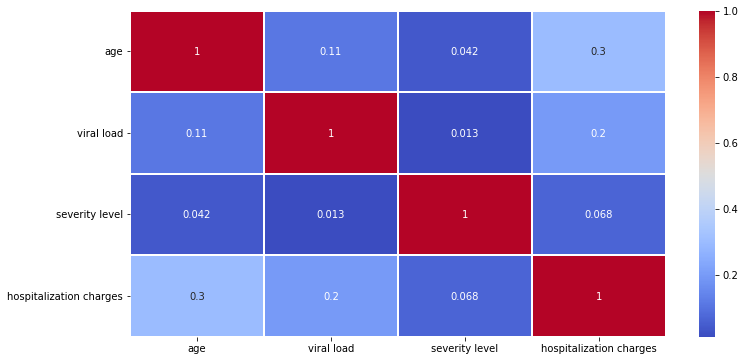

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=1)

# **Univariante Analysis**

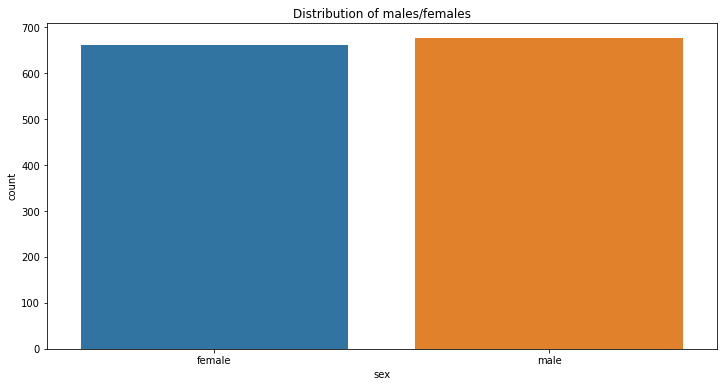

In [ ]:
# count plot on single categorical variable
plt.figure(figsize=(12,6))
plt.title('Distribution of males/females')
sns.countplot(x ='sex', data = df)
plt.show()

**INSIGHT**:The proportion of female is less than the male

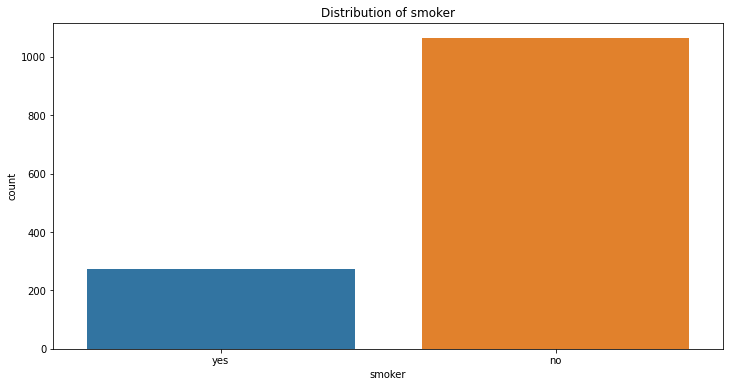

In [ ]:
# count plot on single categorical variable
plt.figure(figsize=(12,6))
plt.title('Distribution of smoker')
sns.countplot(x ='smoker', data = df)
plt.show()

**INSIGHT:** Number of smoker is very less as compared to non-smoker

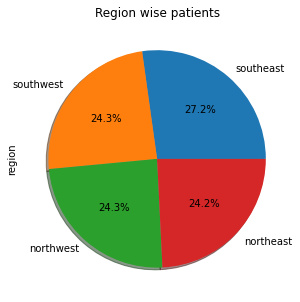

In [ ]:
# count plot on single categorical variable
plt.figure(figsize=(12,5))
plt.title('Region wise patients')
df['region'].value_counts().plot.pie(autopct='%1.1f%%',shadow = True)
# Show the plot
plt.show()

#**Bivariate Analysis**

In [ ]:
smoker_sex=pd.crosstab(df['sex'],df['smoker'])

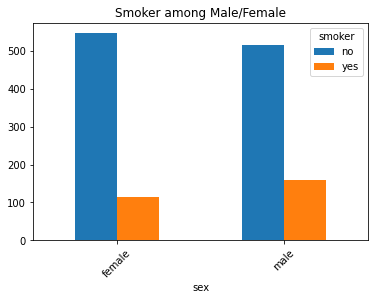

In [ ]:
smoker_sex.plot(kind = 'bar')
plt.title('Smoker among Male/Female')
plt.xticks(rotation = 45)
plt.show()

**INSIGHT**: Male patient prefered to smoke more than female patient.

In [ ]:
rs=pd.crosstab(df['sex'],df['region'])

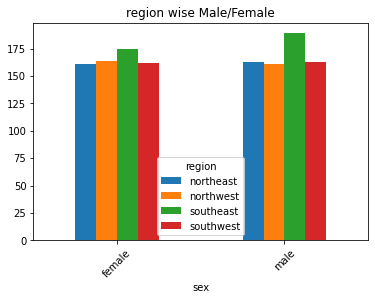

In [ ]:
rs.plot(kind = 'bar')
plt.title('region wise Male/Female')
plt.xticks(rotation = 45)
plt.show()

**INSIGHT**: In Southeast,the number of males and females are at the top with respect to regions.

**Outliers**

Upper_bound : -9.0
Lower_bound : 63.0
age_outlier:  [64]




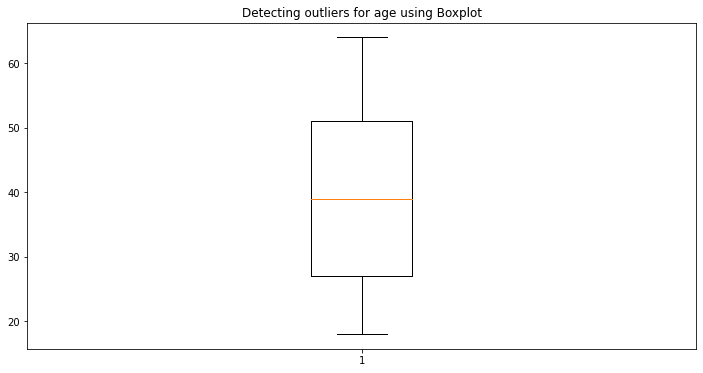

Upper_bound : 4.554999999999997
Lower_bound : 12.970000000000002
viral_load_outlier:  [12.98, 13.09, 13.78, 14.08, 13.81, 13.31, 13.82, 13.97, 13.11, 13.38, 13.52, 15.18, 16.35, 16.02, 17.53, 13.43, 13.46, 13.93, 13.07, 13.14, 14.04, 14.96, 14.25, 13.64, 14.57, 15.57, 15.14, 15.36, 15.11, 16.79, 17.71, 13.05, 13.65, 13.4, 13.33, 13.9, 14.15, 14.22, 14.12, 14.47, 14.37, 15.58, 15.51, 15.4, 15.87, 14.9, 13.71, 13.3, 13.27, 13.23, 13.55, 13.16, 14.3, 14.23, 13.2, 14.45, 13.02, 15.84, 14.34, 15.8, 15.91, 15.3, 13.5, 13.6, 13.42, 13.49, 13.24, 13.03, 14.92, 14.67, 13.74, 13.17, 14.63, 14.74, 14.31, 14.13, 13.13, 13.7]




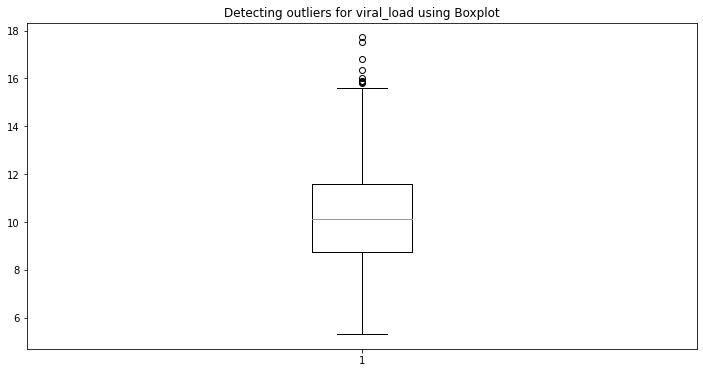

Upper_bound : -3.0
Lower_bound : 3.0
severity_level_outlier:  [4, 5]




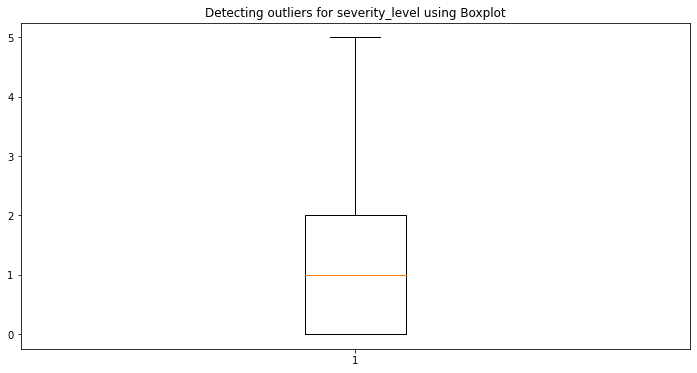

Upper_bound : -32771.75
Lower_bound : 56473.75
hospitalization_charges_outlier:  [71172, 96773, 96778, 67595, 119820, 59918, 93711, 86545, 97813, 96279, 71192, 65047, 92698, 58908, 121373, 87072, 102435, 60452, 150053, 104999, 123944, 58921, 77355, 94255, 81969, 65591, 60984, 87097, 105528, 122426, 110652, 116795, 70720, 61508, 98891, 114255, 73808, 95316, 86100, 115284, 92247, 96866, 114276, 90213, 100456, 108136, 99436, 70253, 137839, 73327, 120433, 72308, 92277, 95861, 99959, 66168, 87673, 59518, 115326, 85635, 107142, 58503, 64141, 90769, 94356, 111253, 72853, 60568, 75417, 88729, 86680, 92835, 86182, 100008, 109741, 115378, 98994, 72376, 101048, 102586, 69311, 159426, 70850, 64197, 75462, 90311, 79050, 122061, 68307, 67795, 99029, 96982, 92376, 97496, 104154, 69853, 62175, 83680, 68835, 61669, 62183, 83690, 109803, 118510, 61679, 62704, 92913, 67316, 60149, 58104, 65273, 85758, 104190, 58112, 90374, 99591, 61191, 72966, 68365, 57614, 84752, 116498, 105759, 84769, 65314, 109860, 96

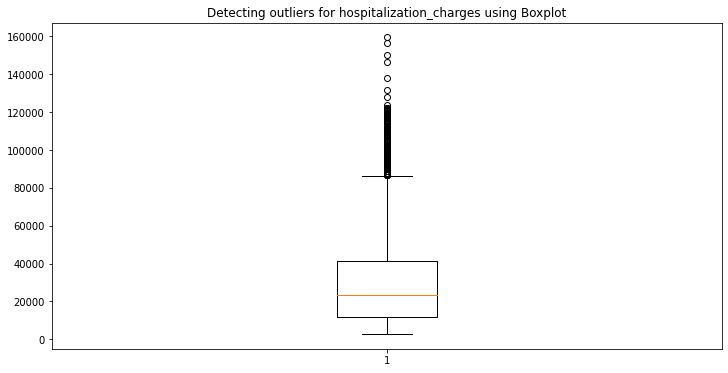

In [ ]:
from scipy.stats.stats import iqr

lst=['age','viral_load','severity_level','hospitalization_charges']
for l in lst:
  q1=df[l].quantile(0.25)
  q3=df[l].quantile(0.75)
  iqr =q3-q1
  print("Upper_bound :",q1-(1.5*iqr))
  print("Lower_bound :",q1+(1.5*iqr))
  outlier = [l for l in df[l] if (l <(q1-(1.5*iqr))) | (l >(q1+(1.5*iqr)))]
  print(l+"_outlier: ",list(set(outlier)))


  print('\n')
  plt.figure(figsize=(12,6))
  plt.boxplot(df[l])
  ttl="Detecting outliers for "+l+" using Boxplot"
  plt.title(ttl)
  plt.show()

#**Levene's test to check whether the variances of the two group are same or not**

Equality of Variance Test:Performing equivalence check by using Levene's test.

The hypothesis of this test are:

Ho - Variances are equal

Ha - Variances are not equal

In [ ]:
# extract the data for smoker and NonSmoker
df_Smoker_hospitalization=df[df['smoker']=='yes']['hospitalization_charges']
df_NonSmoker_hospitalization=df[df['smoker']=='yes']['hospitalization_charges']

In [ ]:
alpha=0.05
Stats, p_value = levene(df_Smoker_hospitalization,df_NonSmoker_hospitalization)
print(f'p value = {p_value}')
if p_value >= alpha:
    print('We fail to reject the Null Hypothesis Ho')
else:
    print('We reject the Null Hypothesis Ho')

p value = 1.0
We fail to reject the Null Hypothesis Ho


# **Normality Test:** 
We have taken the difference between samples of hospitalization of smoker and Non-Smoker and scale it to check the normality.

#**Performing normality check using Shapiro-Wilk Test**

The hypothesis of this test are:

Ho - series is normal

Ha - series is not normal

In [ ]:
#Shapiro-Wilk Test
diff_userscount = scale((np.array(df_Smoker_hospitalization) - np.array(df_NonSmoker_hospitalization)))
stat, p = shapiro(diff_userscount)
print('stat=%.2f, p=%.30f' % (stat, p))

if p > alpha:
    print('Normal distribution/Accept Null Hypothesis')
else:
    print('Not a normal distribution/Reject Null Hypothesis')


stat=1.00, p=1.000000000000000000000000000000
Normal distribution/Accept Null Hypothesis


**INSIGHT:** The distribution of data is normal.

# **Q-Q plot**

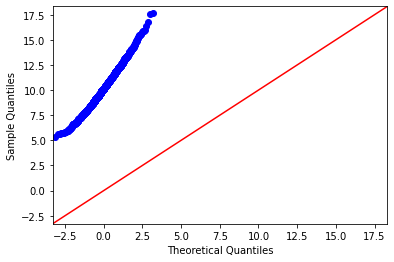

In [ ]:
#q-q plot to check the normality
import statsmodels.api as sm
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df['viral_load'], line='45')
plt.show()

**INSIGHT:**The sample quantiles are not similar to the theoretical quantiles (i.e. the blue points are away from the red line). The greatest part of the sample distribution do not fit quite well with the theoretical one.We can conclude that the distribution is not normal.

# **Histogram plot**

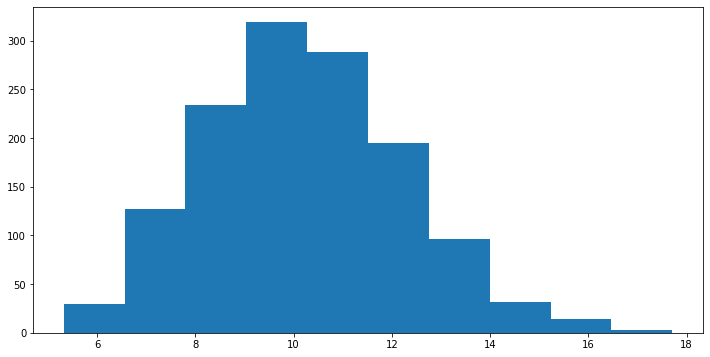

In [ ]:
#Plot histogram to check the normality
#diff_userscount = scale((np.array(df_Smoker_hospitalization) - np.array(df_NonSmoker_hospitalization)))
plt.figure(figsize=(12,6))
plt.hist(df['viral_load'])
plt.show()

**INSIGHT:** The distribution is not close to the normal distribution.


**NOTE: Although the distribution is not normal, but still we have to perform the analysis as per the requirement of question.**

#**T-test Right tailed: Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't?**

In [ ]:
# H0 : Mean of smoker & non-smoker are equal
# H1 : Mean of smoker is greater than non-smoker
# Alpha : 0.05%
alpha = 0.05
stats , p_value = stats.ttest_ind(df_Smoker_hospitalization,df_NonSmoker_hospitalization)

# compare the t-p_value to the significance to determine the result of the test
if p_value > alpha:
  print(f'Fail to reject Null Hypothesis, p-value is {p_value}.\nThere is not sufficient evidence to conclude that the means of the two groups are different.\nThe hospitalization of people who do smoking is not greater than Non-Smoker')
else:
  print('Reject Null Hypothesis.\nThere is sufficient evidence to conclude that the means of the two groups are different.The hospitalization of people who do smoking is greater than Non-Smoker')

Fail to reject Null Hypothesis, p-value is 1.0.
There is not sufficient evidence to conclude that the means of the two groups are different.
The hospitalization of people who do smoking is not greater than Non-Smoker


**INSIGHT**:Fail to reject Null Hypothesis, p-value is 1.0.
There is not sufficient evidence to conclude that the means of the two groups are different.
The hospitalization of people who do smoking is not greater than Non-Smoker

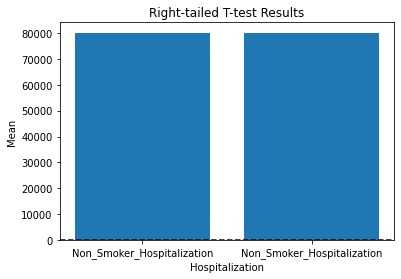

In [ ]:
import matplotlib.pyplot as plt

# compute the means of the two groups
mean1 = df_Smoker_hospitalization.mean()
mean2 = df_NonSmoker_hospitalization.mean()

# create a bar plot
plt.bar([1, 2], [mean1, mean2], align="center")

# add labels and a title
plt.xticks([1, 2], ["Non_Smoker_Hospitalization", "Non_Smoker_Hospitalization"])
plt.xlabel("Hospitalization")
plt.ylabel("Mean")
plt.title("Right-tailed T-test Results")

# add a line at y=0 to show the null hypothesis value
plt.axhline(y=0, color="black", linestyle="--")

# show the plot
plt.show()


#**T-test Two tailed: Prove (or disprove) with statistical evidence that the viral load of females is different from that of males**

In [ ]:
# extract the data for smoker and NonSmoker
# H0 : Mean of viral load of females & males are equal
# H1 : Mean of viral load of females & males are not equal
# Alpha : 0.05%
df_viral_females=df[df['sex']=='female']['viral_load']
df_viral_males=df[df['sex']=='male']['viral_load']

stats , p_value = scipy.stats.ttest_ind(df_viral_females,df_viral_males)

# compare the t-p_value to the significance to determine the result of the test
if p_value > alpha:
  print(f'Fail to reject Null Hypothesis, p-value is {p_value}.\nThe viral load of females is equal to males viral load.')
else:
  print('Reject Null Hypothesis.\nThe viral load of females is different from that of males')

Fail to reject Null Hypothesis, p-value is 0.0901735841670204.
The viral load of females is equal to males viral load.


**INSIGHT:**The viral load of females is equal to males viral load.

#**Chi-square Test : To check if smoking is dependent on the region or not**

H0 : Smoking is not dependent on region

H1 : Smoking is dependent on region

In [ ]:
#Cross-tabulation analysis
smoker_region = pd.crosstab(df['smoker'],df['region'])
smoker_region

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


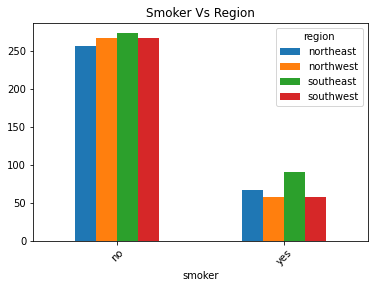

In [ ]:
smoker_region.plot(kind = 'bar')
plt.title('Smoker Vs Region')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Chi2_Contingency Test
t_stats, p_value, dof, expected_frequencies  = stats.chi2_contingency(smoker_region)
#stat, p, dof, expected
print(f" Chi-square statististics value = {t_stats} \n p-value = {p_value} \n degrees of freedom = {dof} \n Array of expected frequenies = {expected_frequencies}")

 Chi-square statististics value = 7.34347776140707 
 p-value = 0.06171954839170547 
 degrees of freedom = 3 
 Array of expected frequenies = [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]


In [ ]:
stats,p_value,degrees_of_freedom,expected = stats.chi2_contingency(smoker_region)
if p_value > alpha:
  print(f' Accept Null Hypothesis\n P-Value = {p_value}\n The proportion of smoking is not dependent on regions')
else:
  print(f' Reject Null Hypothesis\n P-Value = {p_value}\n The proportion of smoking is significantly different across different regions.')

 Accept Null Hypothesis
 P-Value = 0.06171954839170547
 The proportion of smoking is not dependent on regions


**INSIGHT:**The proportion of smoking is not dependent on regions.

# **One way Anova Test:To check the Severity level among women in terms of viral load**

H0 : Mean of viral load at each severity level among female is same.

H1 : Mean of viral load at each severity level among female is different.

In [ ]:
df.head(2)
df.severity_level.unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
df_female=df[df['sex']=='female']

In [ ]:
Stats,p_value = stats.f_oneway(df_female['viral_load'][df['severity_level']==0],df_female['viral_load'][df['severity_level']==1],df_female['viral_load'][df['severity_level']==2],df_female['viral_load'][df['severity_level']==3],df_female['viral_load'][df['severity_level']==4],df_female['viral_load'][df['severity_level']==5])

if p_value > alpha :
  print(' Failed to reject null hypothesis \n Mean of viral load at each severity level among female is same \n p-value :',p_value)
else:
  print(' Reject null hypothesis \n Mean of viral load at each severity level among female is different \n p-value : ',p_value)

 Failed to reject null hypothesis 
 Mean of viral load at each severity level among female is same 
 p-value : 0.9185708092374022


**INSIGHT:** Mean of viral load at each severity level among female is same.

# **Recommendations**
1.The hospitalization of people who do smoking is equal to Non-Smoker. It depicts that the respiratory disease is not matter of concern or severe.

2.The viral load of females is equal to males viral load. The proportion of both female and male is equal due to viral load. Then the patient might belong to same family as it is viral. In that case Apollo should provide discount if the patients belong to same family.

3.The proportion of smoking is not dependent on regions. Irrespective of the region, patient smoke. It means that coming years, more patients are going to admit for respiratory illness in different regions.

4.Mean of viral load at each severity level among female is same. It is indicating the most severe patient at each level is female. Apollo should introduce affordable health checkup for the female quarterly, which may improve the health condition of female.

5.Male patient preferred to smoke more than female patient. Apollo should make aware by workshop or open the rehab center for smoke cessation.

7.There are less smoker overall and female is less as compared to male. But still the severity of female is more than male. Apollo should find the root cause of severe disease among female.